La verosimiglianza del valore del parametro $\theta=\theta^*$ dato il risultato della variabile random $X$

$$
\mathscr{L}(\theta^*|X) = P(X|\theta=\theta^*) = \frac{P(X|\theta^*)}{P(X)}
$$

$$
\mathrm{LR}(X) = \Lambda(\theta_1 : \theta_2|X) = 
\frac{\mathscr{L}(\theta_1|X)}{\mathscr{L}(\theta_2|X)} = 
\frac{P(X|\theta=\theta_1)}{P(X|\theta=\theta_2)} =
\frac{P(X|\theta_1)}{P(X)} \cdot \frac{P(X)}{P(X|\theta_2)} =
\frac{P(X|\theta_1)}{P(X|\theta_2)}
$$

Il rapporto di verosimiglianza dei due valori del parametro $\theta_1$ e $\theta_2$, dato il risultato della variabile $X$ è pari al rapporto tra le verosimiglianze, ovvero tra le probabilità a posteriori di $X$ dato $\theta^*$.

Dal punto di vista dei test diagnostici qualitativi, il risultato della variabile random $X$ è il risultato del test ($\oplus$ e $\ominus$) e i valori dell parametro $\theta_1$ e $\theta_2$ sono la caratteristica (verità non nota) di avere o non avere la malattia ($M$ e $\overline{M}$).

Si distinguono quindi due likelihood ratios per i test diagnostici: $\mathrm{LR}(\oplus)$ per i testi con risultato positivo e $\mathrm{LR}(\ominus)$ per i test con risultati negativo.

$$
\mathrm{LR}(\oplus) = \Lambda(M:\overline{M}|\oplus) = 
\frac{\mathscr{L}(M|\oplus)}{\mathscr{L}(\overline{M}|\oplus)} =
\frac{P(\oplus|m=M)}{P(\oplus|m=\overline{M})} =
\frac{P(\oplus|M)}{P(\oplus)} \cdot \frac{P(\oplus)}{P(\oplus|\overline{M})} = 
\frac{P(\oplus|M)}{P(\oplus|\overline{M})} =
\frac{P(T_{\oplus})}{P(F_{\oplus})} = \frac{\mathbf{SE}}{1 - \mathbf{SP}}
$$

$$
\mathrm{LR}(\ominus) = \Lambda(M:\overline{M}|\ominus) = 
\frac{\mathscr{L}(M|\ominus)}{\mathscr{L}(\overline{M}|\ominus)} =
\frac{P(\ominus|m=M)}{P(\ominus|m=\overline{M})} =
\frac{P(\ominus|M)}{P(\ominus)} \cdot \frac{P(\ominus)}{P(\ominus|\overline{M})} =
\frac{P(\ominus|M)}{P(\ominus|\overline{M})} = 
\frac{P(F_{\ominus})}{P(T_{\ominus})} = \frac{1 - \mathbf{SE}}{\mathbf{SP}}
$$

Dunque:

- $\mathrm{LR}(\oplus)$ può essere interpretato come il rapporto tra la probabilità di _veri positivi_ e di _falsi positivi_
- $\mathrm{LR}(\ominus)$ può essere interpretato come il rapporto tra la probabilità di _falsi negativi_ e di _veri negativi_

$$
\mathbf{VPP} = P(M|\oplus) = 
\mathscr{L}(M|\oplus) \cdot P(M) = 
P(\oplus|m=M) \cdot P(M) =
\frac{P(\oplus|M) \cdot P(M)}{P(\oplus)}
$$

$$
\mathbf{VPN} = P(\overline{M}|\ominus) = 
\mathscr{L}(\overline{M}|\ominus) \cdot P(\overline{M}) = 
P(\ominus|m=\overline{M}) \cdot P(\overline{M}) =
\frac{P(\ominus|\overline{M}) \cdot P(\overline{M})}{P(\ominus)}
$$

Odds

$$
O = \frac{P}{\overline{P}} = \frac{P}{1-P}
$$

$$
P = \frac{O}{1+O}
$$

Per malattia $M$ e test o segno/sintomo $\odot$

$$
O(M) = \frac{P(M)}{P(\overline{M})} = \frac{P(M)}{1-P(M)}
$$

$$
O(M|\odot) = \frac{P(M|\odot)}{P(\overline{M}|\odot)} = \frac{P(M|\odot)}{1-P(M|\odot)}
$$

$$
O(M|\odot) = O(M) \cdot \mathrm{LR}(\odot)
$$

$$
\mathrm{LR}(\odot) = \frac{O(M|\odot)}{O(M)} = 
\frac{P(M|\odot)}{1-P(M|\odot)} \cdot \frac{1-P(M)}{P(M)}
$$

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from IPython.display import clear_output

In [69]:
Results = []
PM = np.linspace(0, 1, 101)  # vettore probabilità a priori {0..1}
SS = np.linspace(0, 1, 101)  # vettore sensibilità e specificità {0..1}

for se, sp, in itertools.permutations(SS, 2):
    PMp = (se * PM) / (se * PM + (1 - sp) * (1 - PM))  # Vettore probabilità a posteriori {0..1}
    PM50 = PM[50]
    PMp50 = PMp[50]
    LR = (PMp50*(1-PM50))/(PM50*(1-PMp50))  # LR calcolato da Odds
    Results.append({
        "SE": se, "SP": sp,
        "PMp": PMp, "LR": LR
    })
clear_output()

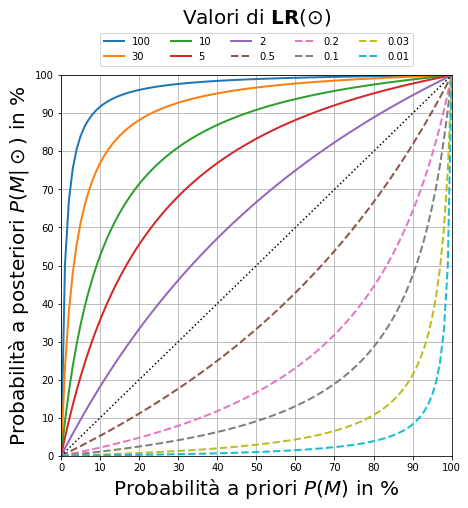

In [70]:
fig, ax = plt.subplots(figsize=(7,7))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

DONE = []
for LRs in [100, 30, 10, 5, 2, .5, .2, .1, .03, .01]:
    for Result in Results:
        if np.isclose(Result["LR"], LRs):
            ax.plot(PM, Result["PMp"], 
                    label=LRs, ls="-" if LRs>1 else "--",
                   lw=2)
            break

ax.plot([0,1], [0,1], c="k", ls=":")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.125), ncol=5)

ax.set_xlabel("Probabilità a priori $P(M)$ in %", fontsize=20)
ax.set_xticks(np.arange(0, 1.1, .1))
ax.set_xticklabels(np.arange(0, 101, 10))
ax.set_ylabel("Probabilità a posteriori $P(M|\odot)$ in %", fontsize=20)
ax.set_yticks(np.arange(0, 1.1, .1))
ax.set_yticklabels(np.arange(0, 101, 10))

ax.set_title("Valori di $\mathbf{LR}(\odot)$", y=1.12, fontsize=20)
ax.grid()

plt.show();

In [16]:
def Pp(x, P):
    return np.exp(P / .19) * (1 - x)

def Pn(x, P):
    return 1 - x * np.exp(P / .19)

In [79]:
se = np.linspace(.01, .99, 101)
sp = np.linspace(.01, .99, 101)
LRp = se[:, None] / (1 - sp)
LRn = (1 - se[:, None]) / sp

In [80]:
.13 + .19 * np.log((1-SE)/SP)

TypeError: unsupported operand type(s) for -: 'int' and 'list'

Text(0.5, 1.15, 'Variazione approssimata delle $P(M)$ probabilità di malattia a posteriori')

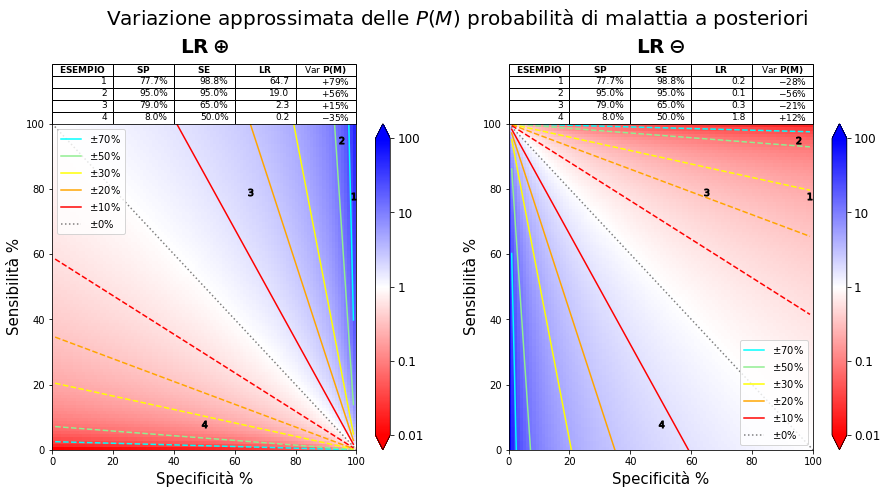

In [117]:
SE = [.777, .95, .79, .08]
SP = [.988, .95, .65, .5]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_title("$\mathbf{LR \oplus}$", fontsize=20, y=1.2)
im0 = ax[0].pcolormesh(np.log(LRp), cmap="bwr_r")
cbar = plt.colorbar(
    im0, extend="both", 
    ticks=[
        -6.75, np.log(.01), np.log(.1), 0, np.log(10), np.log(100), 6.75
    ],
    ax=ax[0]
)
cbar.ax.set_yticklabels([r"$\downarrow 0$", "0.01", "0.1", "1", "10", "100", r"$\uparrow \infty$"], fontsize=12)
ax[0].set_xlabel("Specificità %", fontsize=15)
ax[0].set_ylabel("Sensibilità %", fontsize=15)
for p, c in zip([.7, .5, .3, .2, .1], ["cyan", "lightgreen", "yellow", "orange", "r"]):
    ax[0].plot(sp*100, Pp(sp, p)*100, c=c, label=f"$\pm${p:.0%}")
    ax[0].plot(sp*100, Pp(sp, -p)*100, c=c, ls="--")
ax[0].plot([0, 100], [100, 0], c="k", alpha=.5, ls=":", label="$\pm$0%")
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
for i, (_se, _sp) in enumerate(zip(SE, SP)):
    ax[0].scatter(_sp*100, _se*100, c="k", s=50, marker=f"${i+1}$")
ax[0].legend(loc="upper left")
cellText = [[i+1, f"{_se:.1%}", f"{_sp:.1%}", f"{_se/(1-_sp):.1f}", f"${.19*np.log(_se/(1-_sp))*100:+.0f}$%"] for i, (_se, _sp) in enumerate(zip(SE, SP))]
ax[0].table(cellText=cellText, loc="top", 
            colLabels=["$\mathbf{ESEMPIO}$", "$\mathbf{SP}$", "$\mathbf{SE}$", "$\mathbf{LR}$", "Var $\mathbf{P(M)}$"])


ax[1].set_title("$\mathbf{LR \ominus}$", fontsize=20, y=1.2)
im1 = ax[1].pcolormesh(np.log(LRn), cmap="bwr_r")
cbar = plt.colorbar(
    im1, extend="both", 
    ticks=[
        -6.75, np.log(.01), np.log(.1), 0, np.log(10), np.log(100), 6.75
    ],
    ax=ax[1]
)
cbar.ax.set_yticklabels([r"$\downarrow 0$", "0.01", "0.1", "1", "10", "100", r"$\uparrow \infty$"], fontsize=12)
ax[1].set_xlabel("Specificità %", fontsize=15)
ax[1].set_ylabel("Sensibilità %", fontsize=15)
for p, c in zip([.7, .5, .3, .2, .1], ["cyan", "lightgreen", "yellow", "orange", "r"]):
    ax[1].plot(sp*100, Pn(sp, p)*100, c=c, label=f"$\pm${p:.0%}")
    ax[1].plot(sp*100, Pn(sp, -p)*100, c=c, ls="--")
ax[1].plot([0, 100], [100, 0], c="k", alpha=.5, ls=":", label="$\pm$0%")
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 100)
for i, (_se, _sp) in enumerate(zip(SE, SP)):
    ax[1].scatter(_sp*100, _se*100, c="k", s=50, marker=f"${i+1}$")
ax[1].legend(loc="lower right")
cellText = [[i+1, f"{_se:.1%}", f"{_sp:.1%}", f"{(1-_se)/_sp:.1f}", f"${.19*np.log((1-_se)/_sp)*100:+.0f}$%"] for i, (_se, _sp) in enumerate(zip(SE, SP))]
ax[1].table(cellText=cellText, loc="top",
            colLabels=["$\mathbf{ESEMPIO}$", "$\mathbf{SP}$", "$\mathbf{SE}$", "$\mathbf{LR}$", "Var $\mathbf{P(M)}$"])

fig.suptitle("Variazione approssimata delle $P(M)$ probabilità di malattia a posteriori", fontsize=20, y=1.15)

In [8]:
SE = .777
SP = .988

LRp = SE / (1 - SP)
LRn = (1 - SE) / SP

print(f"LR+ = {LRp:.2f}")
print(f"LR- = {LRn:.2f}")

LR+ = 64.75
LR- = 0.23


In [9]:
prevalence = .13
O = prevalence / (1 - prevalence)
print(f"pre-test odds = {O:.4f}")

pre-test odds = 0.1494


In [10]:
post_odds_p = O * LRp
print(f"PostOdds+ = {post_odds_p:.2f}")

PostOdds+ = 9.68


In [12]:
post_P_p = post_odds_p / (post_odds_p + 1)
print(f"PostPr+ = {post_P_p:.4f}")

PostPr+ = 0.9063


In [13]:
post_odds_n = O * LRn
print(f"PostOdds- = {post_odds_n:.2f}")

PostOdds- = 0.03


In [14]:
post_P_n = post_odds_n / (post_odds_n + 1)
print(f"PostPr- = {post_P_n:.4f}")

PostPr- = 0.0326


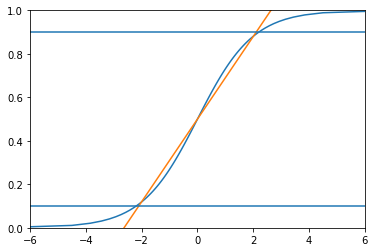

In [59]:
PRE = np.linspace(.001, .999, 101)
ODD = PRE / (1 - PRE)
PRO = 1 / (1 + np.exp(-np.log(ODD)))

plt.plot(np.log(ODD), PRO)
plt.plot(np.log(ODD), .19 * np.log(ODD) + .5)
plt.ylim(0, 1)
plt.xlim(-6, 6)
plt.axhline(.9)
plt.axhline(.1)

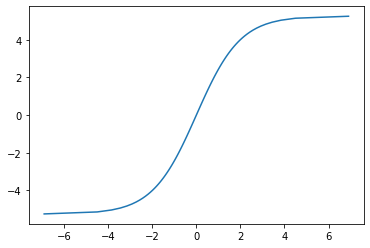

In [66]:
x = np.linspace(.001, .999, 101)
y = np.linspace(.999, .001, 101)
d = x - y
j = np.log(x) - np.log(y)
plt.plot(j, d/.19)